# Predavanja iz Prepoznavanja oblika
### Pomoćne funkcije

In [53]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
import IPython.display
import ipywidgets
import time
import threading

matplotlib.rc('text', usetex=True)

In [55]:
def f_contour(f, x, y, threshold=0, color=None, label_position=None, label=None, linestyle='solid'):    
    contour = ax.contour(x, y, f, levels=[threshold], colors=color, linestyles=linestyle)
    if label_position is None:
        manual = None
    else:
        manual = [label_position]
        
    if label is not None:
        ax.clabel(contour, inline=1, fontsize=10, colors=color, fmt={threshold:label}, manual=manual)

def pdf_contour(f, x, y, thresholds=(0.3, 0.7), color=None, label_positions=None, f_name='f'):
    if label_positions is None:
        label_positions = [None] * len(thresholds)
    f_max = np.max(f)
        
    for threshold, label_position in zip(thresholds, label_positions):
        f_contour(f, x, y, threshold * f_max, color, label_position=label_position, label='$' + str(threshold) + f_name + '_{max}$')

def decision_contour(f, x, y, color=None, label_position=None, label=None, f_name='h'):
    f_contour(f, x, y, color=color, label_position=label_position, label=label, linestyle='dashed')
    

## Testiranje hipoteza

### Bajesovo pravilo minimalne greške

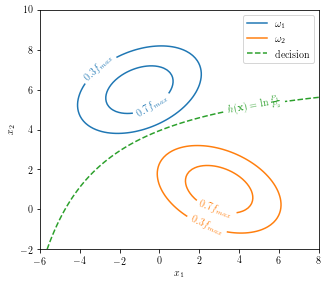

In [3]:
x_space = np.linspace(-6, 8, 100)
y_space = np.linspace(-2, 10, 100)
x, y = np.meshgrid(x_space, y_space)
pos = np.dstack((x, y))

f1 = scipy.stats.multivariate_normal([-1, 6], [[4, 1], [1, 2]])
p1 = 0.3
f2 = scipy.stats.multivariate_normal([3, 1], [[4, -1], [-1, 2]])
p2 = 1 - p1

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

pdf_contour(f1.pdf(pos), x, y, color='C0')
pdf_contour(f2.pdf(pos), x, y, color='C1')

h = -np.log(f1.pdf(pos)) + np.log(f2.pdf(pos))
h -= np.log(p1/p2)

decision_contour(h, x, y, color='C2', label='$h(\\mathbf{x}) = \\ln\\frac{P_1}{P_2}$')


ax.set_aspect('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.plot([], [], '-', color='C0')
plt.plot([], [], '-', color='C1')
plt.plot([], [], '--', color='C2')
plt.legend([r'$\omega_1$', r'$\omega_2$', r'$\textrm{decision}$'])

plt.savefig('a.svg')
plt.show()
# 
# fig, ax = plt.subplots()
# hh, = ax.plot([1, 2, 3])
# ax.legend([hh], ['aaaa'])
# plt.show()

### Bajesovo pravilo minimalne cene

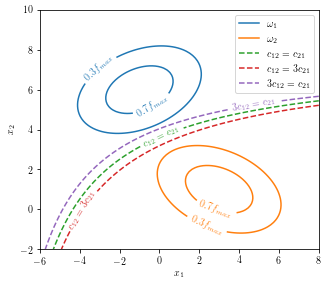

In [4]:
x_space = np.linspace(-6, 8, 100)
y_space = np.linspace(-2, 10, 100)
x, y = np.meshgrid(x_space, y_space)
pos = np.dstack((x, y))

n1 = scipy.stats.multivariate_normal([-1, 6], [[4, 1], [1, 2]])
n2 = scipy.stats.multivariate_normal([3, 1], [[4, -1], [-1, 2]])

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

pdf_contour(n1.pdf(pos), x, y, color='C0')
pdf_contour(n2.pdf(pos), x, y, color='C1')

h = -np.log(n1.pdf(pos)) + np.log(n2.pdf(pos))

decision_contour(h + np.log(1/3), x, y, color='C3', label="$c_{12}=3c_{21}$", label_position=(-4, 0))
decision_contour(h, x, y, color='C2', label="$c_{12}=c_{21}$", label_position=(1, 2))
decision_contour(h + np.log(3), x, y, color='C4', label="$3c_{12}=c_{21}$", label_position=(5, 4))

ax.set_aspect('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.plot([], [], '-', color='C0')
plt.plot([], [], '-', color='C1')
plt.plot([], [], '--', color='C2')
plt.plot([], [], '--', color='C3')
plt.plot([], [], '--', color='C4')
plt.legend([r'$\omega_1$', r'$\omega_2$', r'$c_{12}=c_{21}$', "$c_{12}=3c_{21}$", "$3c_{12}=c_{21}$"])

plt.savefig('a.svg')
plt.show()

# print(np.sum(fho * (fho < 0)) / np.sum(fho < 0))

### Neyman-Pears-ov test

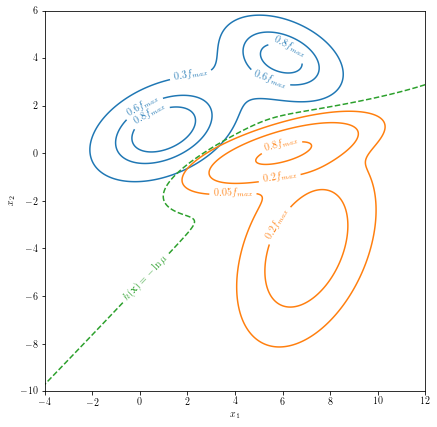

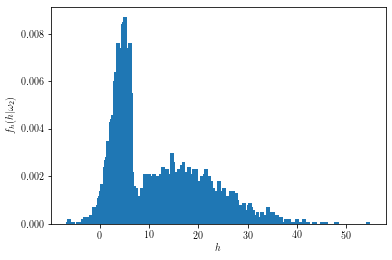

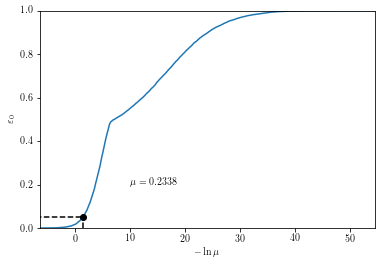

In [116]:
x_space = np.linspace(-4, 12, 1000)
y_space = np.linspace(-10, 6, 1000)
x, y = np.meshgrid(x_space, y_space)
pos = np.dstack((x, y))

p11 = 0.6
n11 = scipy.stats.multivariate_normal([1, 1], [[4, 1.1], [1.1, 2]])
p12 = 1 - p11
n12 = scipy.stats.multivariate_normal([6, 4], [[3, -0.8], [-0.8, 1.5]])
p21 = 0.55
n21 = scipy.stats.multivariate_normal([7, -4], [[2, 1.1], [1.1, 4]])
p22 = 1 - p21
n22 = scipy.stats.multivariate_normal([6, 0], [[3, 0.8], [0.8, 0.5]])

def f1(x):
    return p11 * n11.pdf(x) + p12 * n12.pdf(x)

def f2(x):
    return p21 * n21.pdf(x) + p22 * n22.pdf(x)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

pdf_contour(f1(pos), x, y, thresholds=(0.3, 0.6, 0.8), color='C0')
pdf_contour(f2(pos), x, y, thresholds=(0.05, 0.2, 0.8), color='C1')

h = -np.log(f1(pos)) + np.log(f2(pos))
h -= np.log(0.2184)

decision_contour(h, x, y, color='C2', label=r'$h(\mathbf{x})=-\ln\mu$', label_position=(0, -5))

ax.set_aspect('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

plt.savefig('a.svg')
plt.show()

N = 10000
select = np.random.rand(N, 1) < p21
samples = n21.rvs(N) * select + n22.rvs(N) * (1 - select)

h = -np.log(f1(samples)) + np.log(f2(samples))

H, t = np.histogram(h, bins=1000)

plt.bar(t[:-1], H / N)
plt.xlabel('$h$')
plt.ylabel(r'$f_{h}(h|\omega_2)$')
plt.show()

H = np.cumsum(H) / N

T = (t[:-1] + t[1:]) / 2
diffs = t[1:] - t[:-1]

min_index = np.argmin(np.abs(0.05 - H)) 
mint = T[min_index]

plt.plot(T, H)
plt.xlim(np.min(T), np.max(T))
plt.ylim(0, 1)
plt.text(10, 0.2, '$\\mu=' + "{:.04f}".format(np.exp(-mint)) + '$')
plt.plot([-10, mint], [0.05, 0.05], '--k')
plt.plot([mint, mint], [0, 0.05], '--k')
plt.plot([mint], [0.05], 'ok')
plt.xlabel(r'$-\ln\mu$')
plt.ylabel(r'$\varepsilon_0$')
plt.show()

### Minmax test

In [118]:
x_space = np.linspace(-4, 12, 1000)
y_space = np.linspace(-10, 6, 1000)
x, y = np.meshgrid(x_space, y_space)
pos = np.dstack((x, y))

p11 = 0.6
n11 = scipy.stats.multivariate_normal([1, 1], [[4, 1.1], [1.1, 2]])
p12 = 1 - p11
n12 = scipy.stats.multivariate_normal([6, 4], [[3, -0.8], [-0.8, 1.5]])
p21 = 0.55
n21 = scipy.stats.multivariate_normal([7, -4], [[2, 1.1], [1.1, 4]])
p22 = 1 - p21
n22 = scipy.stats.multivariate_normal([6, 0], [[3, 0.8], [0.8, 0.5]])

c11 = c22 = 0
c12 = 2
c21 = 1

def f1(x):
    return p11 * n11.pdf(x) + p12 * n12.pdf(x)

def f2(x):
    return p21 * n21.pdf(x) + p22 * n22.pdf(x)

h = -np.log(f1(pos)) + np.log(f2(pos))


def calculate_risk(P1):
    if P1 == 0 or P1 == 1:
        return 0
    f1_pos = f1(pos)
    f2_pos = f2(pos)
    diff_x = x_space[1] - x_space[0]
    diff_y = y_space[1] - y_space[0] 
    int_f1 = np.sum(f1_pos * (h > np.log((c12 - c22) * P1 / (1 - P1) / (c21 - c11)))) * diff_x * diff_y
    int_f2 = np.sum(f2_pos * (h < np.log((c12 - c22) * P1 / (1 - P1) / (c21 - c11)))) * diff_x * diff_y
    return c22 + (c12 - c22) * int_f2 + P1 * ((c11 - c22) + (c21 - c11) * int_f1 - (c12 - c22) * int_f2)

p1_range = np.linspace(0, 1, 101)
risk = []

def calculate_risk_curve():
    global risk
    for P1 in p1_range:
        p1_progress.value = P1
        p1_progress_label.value ='Calculating risk for P1={:.03f}'.format(P1)
        risk.append(calculate_risk(P1))
        
p1_progress = ipywidgets.FloatProgress(0, min=0, max=1)
p1_progress_label = ipywidgets.Label('Calculating risk for P1=0')
thread = threading.Thread(target=calculate_risk_curve)
IPython.display.display(p1_progress_label)
IPython.display.display(p1_progress)
thread.start()

Label(value='Calculating risk for P1=0')

FloatProgress(value=0.0, max=1.0)

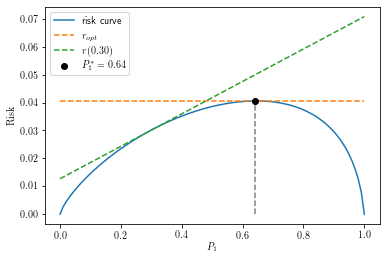

In [121]:
P1_opt = np.argmax(risk)
r_opt = risk[P1_opt]
P1_opt = p1_range[P1_opt]

P1_example = 0.3
P1_example_index = round(P1_example * (p1_range.shape[0] - 1))
dP1 = p1_range[P1_example_index + 1] - p1_range[P1_example_index - 1]
dr = risk[P1_example_index + 1] - risk[P1_example_index - 1]
P1_example_k = dr / dP1 
P1_example_r = calculate_risk(P1_example)
P1_example_0 = P1_example_r - P1_example * P1_example_k
P1_example_1 = P1_example_r + (1 - P1_example) * P1_example_k

plt.plot(p1_range, risk)
plt.plot([0, 1], [r_opt, r_opt], '--')
plt.plot([0, 1], [P1_example_0, P1_example_1], '--')
plt.plot([P1_opt], [r_opt], 'ok')
plt.plot([P1_opt, P1_opt], [0, r_opt], '--k', alpha=0.5)
plt.xlabel('$P_1$')
plt.ylabel(r'$\textrm{Risk}$')
plt.legend(['risk curve', '$r_{opt}$', '$r({:.02f})$'.format(P1_example), '$P_1^*={}$'.format(P1_opt)])
plt.show()

## Ostali testovi hipoteza

### Test više hipoteza